In [ ]:
"""
Simple first round EDA:

1. Most common words
2. Size of vocabulary
3. (??)

"""

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter

from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud

### 1. Load data

In [22]:
speech_df = pd.read_pickle('../dump/speech_df')
speech_clean = pd.read_pickle('../dump/speech_clean')
data = pd.read_pickle('../dump/data_dtm.pkl')
data = data.transpose()
data.head()

,0,1,2,3,4,5,6,7,8,9,...,461,462,463,464,465,466,467,468,469,470
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aahhhh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaron,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aback,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abalthus,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Find the top 30 words said in each speech
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{0: [('listening', 24),
  ('history', 13),
  ('like', 11),
  ('listen', 10),
  ('mind', 10),
  ('cancer', 9),
  ('learned', 8),
  ('learn', 7),
  ('talk', 7),
  ('time', 7),
  ('kind', 7),
  ('head', 7),
  ('began', 6),
  ('child', 6),
  ('want', 5),
  ('laws', 5),
  ('percent', 5),
  ('form', 5),
  ('leukemia', 5),
  ('requirement', 5),
  ('past', 5),
  ('heads', 5),
  ('generation', 5),
  ('know', 5),
  ('thats', 5),
  ('told', 5),
  ('smile', 5),
  ('illness', 5),
  ('morning', 4),
  ('yes', 4)],
 1: [('life', 16),
  ('school', 15),
  ('work', 14),
  ('choice', 13),
  ('read', 11),
  ('success', 10),
  ('didnt', 10),
  ('step', 10),
  ('did', 10),
  ('job', 9),
  ('people', 9),
  ('education', 9),
  ('thought', 8),
  ('worked', 8),
  ('children', 8),
  ('high', 7),
  ('good', 7),
  ('grandmother', 7),
  ('hard', 7),
  ('realized', 7),
  ('took', 6),
  ('university', 6),
  ('choices', 6),
  ('wasnt', 6),
  ('like', 6),
  ('stories', 6),
  ('instead', 6),
  ('college', 6),
  ('wrote',

In [12]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
# words

In [11]:
Counter(words).most_common()

[('life', 308),
 ('know', 267),
 ('people', 267),
 ('just', 264),
 ('like', 257),
 ('time', 247),
 ('world', 245),
 ('years', 220),
 ('dont', 212),
 ('make', 187),
 ('today', 168),
 ('way', 162),
 ('think', 154),
 ('going', 149),
 ('want', 146),
 ('things', 142),
 ('say', 139),
 ('im', 139),
 ('said', 138),
 ('work', 130),
 ('youre', 128),
 ('day', 126),
 ('new', 125),
 ('good', 122),
 ('great', 111),
 ('right', 105),
 ('really', 100),
 ('college', 93),
 ('school', 92),
 ('did', 92),
 ('thats', 90),
 ('got', 84),
 ('tell', 75),
 ('thing', 71),
 ('come', 70),
 ('class', 66),
 ('remember', 65),
 ('need', 62),
 ('little', 62),
 ('love', 62),
 ('job', 54),
 ('didnt', 52),
 ('ive', 51),
 ('parents', 51),
 ('best', 50),
 ('thank', 47),
 ('better', 47),
 ('lives', 47),
 ('human', 44),
 ('success', 43),
 ('look', 43),
 ('education', 42),
 ('university', 41),
 ('hope', 40),
 ('future', 40),
 ('live', 40),
 ('let', 38),
 ('women', 38),
 ('learned', 37),
 ('hard', 37),
 ('believe', 37),
 ('man', 

In [30]:
from wordcloud import WordCloud

add_stop_words = ['like','youre','ive','im','really','id','ve','just','dont']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

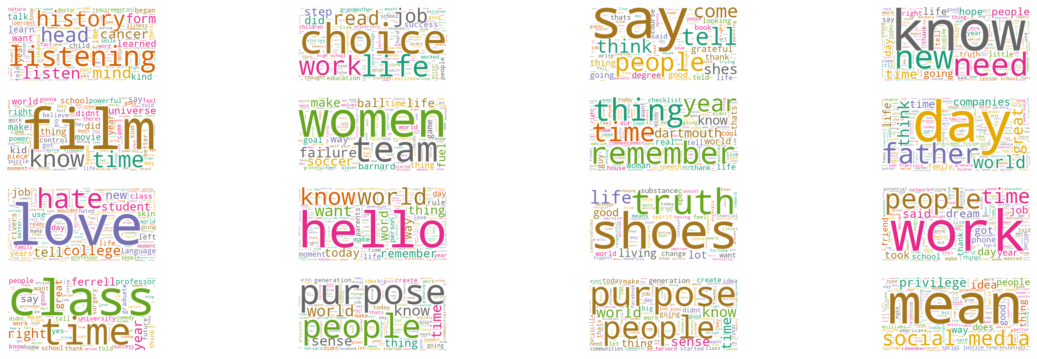

In [36]:
# Reset the output dimensions
plt.rcParams['figure.figsize'] = [20, 8]

# full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
#               'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# Create subplots for each comedian
for index, speech in enumerate(data.iloc[:,:16].columns):
    wc.generate(speech_clean.transcript[speech])
    
    plt.subplot(5, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
#     plt.title(full_names[index])
    
plt.show()